# Assignment 1 - Introduction to Machine Learning

For this assignment, we will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    amount_feature = len(cancer['feature_names'])
    return amount_feature
answer_zero()

30

In [4]:
cancer['data'].shape

(569, 30)

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer['target'].shape

(569,)

In [7]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

## Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [8]:
index = np.arange(0, 569, 1)
df = pd.DataFrame({c:cancer['data'].T[ii] for ii, c in enumerate(cancer['feature_names'])}, index=index)
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

## Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [10]:
instances = [df[df['target'] == 0].shape[0], df[df['target'] == 1].shape[0]]
class_dist = pd.Series(instances, index=['malignant', 'benign'])
class_dist

malignant    212
benign       357
dtype: int64

## Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [11]:
X = df.iloc[:, 0:30]
X.shape

(569, 30)

In [12]:
# where we identify the target column as the labels.
y = df.loc[:, 'target']
y.shape

(569,)

In [13]:
split_tuple = (X, y)
len(split_tuple)

2

## Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
train_test_tuple = (X_train, X_test, y_train, y_test)
print([k.shape for k in train_test_tuple])

[(426, 30), (143, 30), (426,), (143,)]


## Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [15]:
#first let's create that knn classifier object, using one nearest neighbor
knn = KNeighborsClassifier(n_neighbors=1)
# now we are going to train it
knn.fit(X_train, y_train)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

## Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [16]:
mean_df = X.mean().values.reshape(1, -1)
mean_df.shape

(1, 30)

In [17]:
mean_prediction = knn.predict(mean_df)
print('Prediction using mean values is {}, i.e., benign cells'.format(mean_prediction[0]))

Prediction using mean values is 1, i.e., benign cells


## Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [18]:
cancer_prediction = knn.predict(X_test)
cancer_prediction.shape

(143,)

## Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [19]:
knn.score(X_test, y_test)

0.916083916083916

## Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

/tmp/ipykernel_16881/161672910.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_malignant = X_test[df['target'] == 0]
/tmp/ipykernel_16881/161672910.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_benign = X_test[df['target'] == 1]
/tmp/ipykernel_16881/161672910.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_malignant = X_train[df['target'] == 0]
/tmp/ipykernel_16881/161672910.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_benign = X_train[df['target'] == 1]


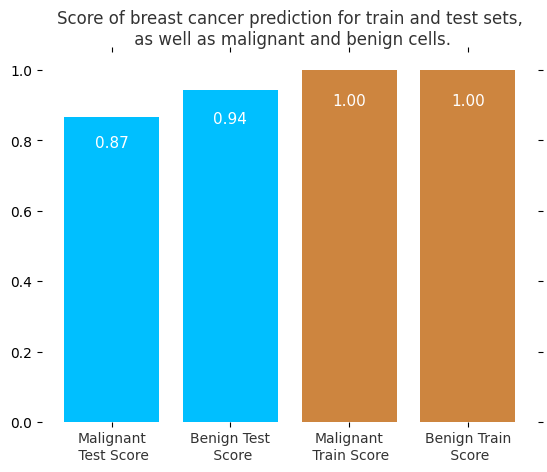

In [20]:
import matplotlib.pyplot as plt

# first we slip test data between benign and malignant diagnostic
X_test_malignant = X_test[df['target'] == 0]
y_test_malignant = y_test[df['target'] == 0]
X_test_benign = X_test[df['target'] == 1]
y_test_benign = y_test[df['target'] == 1]

# now, we split training data
X_train_malignant = X_train[df['target'] == 0]
y_train_malignant = y_train[df['target'] == 0]
X_train_benign = X_train[df['target'] == 1]
y_train_benign = y_train[df['target'] == 1]

plt.figure()

options =['Malignant\n Test Score', 'Benign Test\n Score', 'Malignant\n Train Score', 'Benign Train\n Score']
position = np.arange(len(options))
scores = [knn.score(X_test_malignant, y_test_malignant),
          knn.score(X_test_benign, y_test_benign),
          knn.score(X_train_malignant, y_train_malignant),
          knn.score(X_train_benign, y_train_benign)]

# change the bar color to be less bright blue
bars = plt.bar(position, scores, align='center', linewidth=0)
# make one bar, the python bar, a contrasting color
color = ['deepskyblue', 'peru']
for k in position:
    bars[k].set_color(color[int(k/2)])

# soften all labels by turning grey
plt.xticks(position, options, alpha=0.8)
# remove the Y label since bars are directly labeled
# plt.ylabel('Score', alpha=0.8)
plt.title('Score of breast cancer prediction for train and test sets,\n as well as malignant and benign cells.', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                   ha='center', color='w', fontsize=11)
plt.show()